In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [15]:
from data_loader import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(402, 64, 64, 3)
(402, 1)
(40, 64, 64, 3)
(40, 1)


In [17]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(402, 12288)

In [18]:
cat_model = Sequential()
cat_model.add(Dense(128, activation='relu', input_shape=(12288,)))
cat_model.add(Dense(64, activation='relu'))
cat_model.add(Dense(32, activation='relu'))
cat_model.add(Dense(16, activation='relu'))
cat_model.add(Dense(1, activation='sigmoid'))

In [19]:
cat_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1572992   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 1,583,873
Trainable params: 1,583,873
Non-trainable params: 0
_________________________________________________________________


In [20]:
cat_model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
cat_model.fit(x_train, y_train,epochs=20 ,validation_data=(x_test, y_test))

Train on 402 samples, validate on 40 samples
Epoch 1/20
402/402 [==============================] - 1s 2ms/step - loss: 0.7019 - acc: 0.5000 - val_loss: 0.7015 - val_acc: 0.4500
Epoch 2/20
402/402 [==============================] - 0s 541us/step - loss: 0.6926 - acc: 0.5174 - val_loss: 0.7010 - val_acc: 0.4250
Epoch 3/20
402/402 [==============================] - 0s 686us/step - loss: 0.6870 - acc: 0.5522 - val_loss: 0.7009 - val_acc: 0.4750
Epoch 4/20
402/402 [==============================] - 0s 650us/step - loss: 0.6855 - acc: 0.5448 - val_loss: 0.7002 - val_acc: 0.4500
Epoch 5/20
402/402 [==============================] - 0s 566us/step - loss: 0.6777 - acc: 0.5995 - val_loss: 0.7057 - val_acc: 0.4250
Epoch 6/20
402/402 [==============================] - 0s 476us/step - loss: 0.6806 - acc: 0.6045 - val_loss: 0.7320 - val_acc: 0.5000
Epoch 7/20
402/402 [==============================] - 0s 548us/step - loss: 0.6703 - acc: 0.5771 - val_loss: 0.6930 - val_acc: 0.5500
Epoch 8/20
402/402 

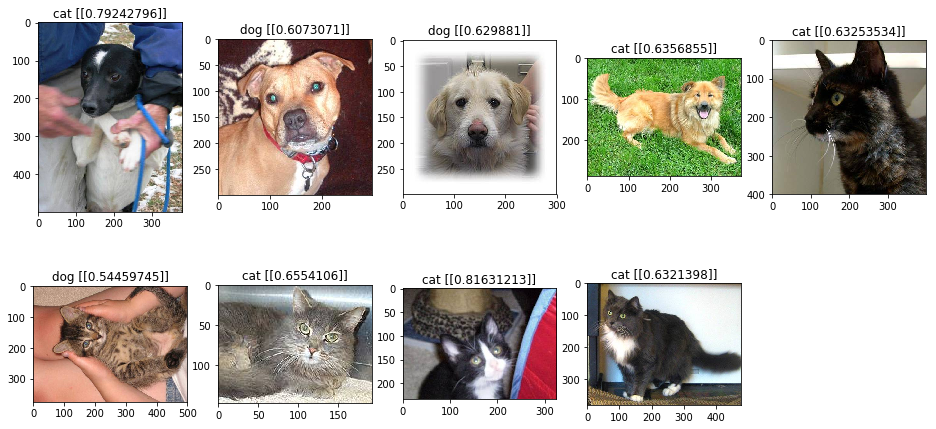

40/40 [==============================] - 0s 391us/step


[0.8089713335037232, 0.525]

In [22]:
from skimage.transform import resize
fig=plt.figure(figsize=(16, 16))
for i in range(1, 10):
    my_image =  'images/test/{}.jpg'.format(i)
    my_image = np.array(plt.imread(my_image))
    ax = fig.add_subplot(4, 5, i)
    plt.imshow(my_image)
    num_px = 64
    my_image = resize(my_image, (num_px, num_px))
    my_image.shape
    my_image = my_image.reshape(1, -1)
    a = cat_model.predict(my_image)
    if  a > 0.5:
        ax.title.set_text('cat {}'.format(a))
    else:
        ax.title.set_text('dog {}'.format(1 - a))
    
plt.show()
cat_model.evaluate(x_test, y_test)